# Assignment 1: Projective Transform

MIDS W281: Computer Vision

## Recommended Libraries

In [1]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
from PIL import Image
import os
import imageio
import copy

## Part 1: Pole Height

![Hybrid Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_1/pole_length.png)

### Overview
Single-view metrology corresponds to a set of techniques for making 3-D measurements from a single 2-D image. Such measurements have several applications including, for example, measuring the height of a suspect in a crime-scene image. We will consider a simple scenario of single-view metrology estimating 3-D measurements of objects in a rendered 2-D image.

### Description

Consider the image shown in Figure 1. You are given the following information about the 3-D scene. There are three poles colored yellow, green, and blue, and a ground plane in this scene. The three poles are perpendicular to the ground plane. The ground plane is parallel to the X-Z plane, and the camera's optical axis is parallel to the Z-axis. Standing at 4 meters, the yellow and green poles are of the same height in the 3-D scene. The distance between these two poles is 17 meters. The green and blue poles are at the same, but unknown, distance from the camera. Finally, the resolution of the image sensor of the camera is 53,333 pixels per meter.

Recall the perspective projection equation that tells us the relationship between a point's location in the 3-D world (X,Y,Z), the camera focal length (f), and the projection of that point in the image (x,y):  
$$\frac{x}{X}=\frac{f}{Z}$$
and
$$\frac{y}{Y}=\frac{f}{Z}$$
&nbsp;

Write a python script to measure the heights and distances between the poles in image coordinates. You may use the pixel locations provided below to estimate the location of the pole endpoints in the image:

$$yellow = [[518, 391],  [512, 987]]$$
$$green = [[733, 462],  [732, 771]]$$
$$blue = [[1189, 311], [1189, 769]]$$

From these image measurements and the 3-D quantities specified above, you will be able to determine the camera focal length and 3-D height of the blue pole.

### Deliverables:

Using the above perspective projection equations, **write code to compute and report**:
- Camera focal length f (in mm)
- 3-D height (Y) of blue pole (in m)

##Step 1: Find Focal length
(𝑓) in millimeters.

Since I know the real-world heights ( 4 meters - same height) and distances (17 meters) of the Yellow and Green poles I can use this to calculate the Focal Length of the camera.

However to calculate the Focal Length I need the poles height in pixel values. I know that the pixel cordinates of the yellow and green poles are:

$$yellow = [[518, 391],  [512, 987]]$$
$$green = [[733, 462],  [732, 771]]$$

The height of each pole would be the distance between their greatest y cordinate minus their lowest y cordinate





In [2]:
yellow = [[518, 391],[512, 987]] # Yellow pole's image cordinates
green = [[733, 462],[732, 771]] # Green pole's image cordinates
blue = [[1189,311],[1189,769]] # Blue pole's image cordinates

def CalculatePixelHeight(topY, bottomY):
  """
  Calculates the pixel height of an object based on the Y-coordinates
  of its top and bottom in an image.

  Args:
    topY (int): The Y-coordinate of the top of the object in pixels.
    bottomY (int): The Y-coordinate of the bottom of the object in pixels.

  Returns:
    int: The height of the object in pixels.
  """
  return bottomY - topY

yellow_pixel_height = CalculatePixelHeight(yellow[0][1], yellow[1][1])
green_pixel_height = CalculatePixelHeight(green[0][1], green[1][1])
blue_pixel_height = CalculatePixelHeight(blue[0][1], blue[1][1])

print(f"Yellow Pole Height: {yellow_pixel_height} pixels")
print(f"Green Pole Height: {green_pixel_height} pixels")
print(f"Blue Pole Height: {blue_pixel_height} pixels")

Yellow Pole Height: 596 pixels
Green Pole Height: 309 pixels
Blue Pole Height: 458 pixels


$$\text{Pixel Height of Yellow Pole}=987−391=596\text{ pixels}$$

Now that I know the Yellow pole's height in pixels I now need to calculate its real world distance (Z) from the camera to finally be able to use the perspective projection formula:

$$
\text{Pixel Height of Yellow Pole} = 987 - 391 = 596 \, \text{pixels}
$$

Now that I know the Yellow pole's height in pixels, I need to calculate its real-world distance (\(Z\)) from the camera to finally be able to use the perspective projection formula:

$$
\text{Pixel Height} = f \cdot \frac{\text{Real Height}}{Z}
$$

The perspective projection formula in simple terms explains why objects look smaller when they’re farther away and how their size on the image relates to their size and distance in the real world.

Rewriting the perspective projection formula will allow me to calculate the focal length: $$f$$

However, without getting too ahead of myself, I first need to calculate Yellow's real world distance to the camera: $$Z_{\text{Yellow}}$$ by using the ratio of pixel heights and distances between the Yellow and Green poles.

The ratio of the pixel heights of the yellow and green poles is equal to the inverse ratio of their distances from the camera:

$$
\frac{\text{Pixel Height of Yellow Pole}}{\text{Pixel Height of Green Pole}} = \frac{Z_{\text{Green}}}{Z_{\text{Yellow}}}
$$

This relationship allows us to calculate $$Z_{\text{Yellow}}$$ or $$Z_{\text{Green}}$$

In this case I will make a function that lets us do it for either case







In [3]:
def RatioPixelHeights(height1, height2):
  """
  Calculates the ratio of two pixel heights.

  Args:
    height1 (float): The pixel height of the first object (e.g., Yellow Pole).
    height2 (float): The pixel height of the second object (e.g., Green Pole).

  Returns:
    float: The ratio of height1 to height2.
  """
  return height1/height2

# Calculate ratio of distances
yellow_green_ratio = RatioPixelHeights(yellow_pixel_height, green_pixel_height)
green_yello_ratio = RatioPixelHeights(green_pixel_height, yellow_pixel_height)

print(f"Yellow Pole Ratio to Green is: {yellow_green_ratio}")

Yellow Pole Ratio to Green is: 1.9288025889967637


Now that we have the ratio of the green and yellow poles' pixel heights we remember that it is equal to the inverse ratio of their distances from the camera. We have to recall that the distance between Yellow and Green is 17 meters (we will need this to calculate the the real-world distance of the yellow pole from the camera)

$$
Z_{\text{Yellow}} = \frac{\text{Separation Between Poles}}{\frac{\text{Pixel Height of Yellow Pole}}{\text{Pixel Height of Green Pole}} - 1}
$$

Where:
- $$Z_{\text{Yellow}}$$: is the distance of the yellow pole from the camera (in meters).
- Separation Between Poles: is the real-world distance between the yellow and green poles which is 17 meters
- $$\frac{\text{Pixel Height of Yellow Pole}}{\text{Pixel Height of Green Pole}}$$ is the ratio of pixel heights of the yellow and green poles. Which is 1.9288025889967637




In [4]:
yellow_dist_from_cam = 17 / (yellow_green_ratio  -1)
print(f"The Yellow pole's distance from the camera is: {np.round(yellow_dist_from_cam, 2)} meters")

The Yellow pole's distance from the camera is: 18.3 meters


Ok great, now I have every piece of the puzzel to calcualte the cameras focal length. However to do so I will need to rewrite the perspective projection formula:

$$
\text{Pixel Height} = f \cdot \frac{\text{Real Height}}{Z}.
$$

Using multiplication I can multiply both sides of the equation by Z to get rid of the denominator

$$
\text{Pixel Height} \cdot Z = f \cdot{\text{Real Height}}
$$

Then to isolate f I will divide Real Height to both sides leaving me with

$$
f = \frac{\text{Pixel Height} \cdot Z}{\text{Real Height}}
$$

ok just a recap:

*   (Pixel Height) is how many pixels tall an object is in this case our object is the Yellow pole which we calculated to be 596 pixels
*   Z is the "REAL WORLD" distance to the camera the object was loacted when the picture was taken in this case Yellow is 18.3 meters
*   Real height is self explanitory in this case Yello was given to us to be 4 meters tall
*   F is the focal length, which controls the angle of view and magnification of a photograph, which we are solving for





Plug that all in and boom we have:

$$
f = \frac{\text{596} \cdot 18.30}{\text{4}}
$$


In [5]:
cam_focal_len = 596 * 18.30 / 4
print(f"The Camera's Focal Length is: {np.round(cam_focal_len, 2)} pixels")

The Camera's Focal Length is: 2726.7 pixels


HIP HIP

HORAAAY

HIP HIP

No wait stop! Lets read the directions carefully!



> *Using the above perspective projection equations, write code to compute and report:*
>
>*Camera focal length f (in **mm**)*


Notice the problem? No? Ok lets zoom in

##(in **mm**)

Yup, we have $$f$$ in pixel we need it in mm, but no worries thats an easy fix we just need to convert the focal length from pixels to millimeters using this formula

$$
f_{\text{mm}} = \frac{f_{\text{pixels}}}{\text{Resolution (pixels per meter)}} \cdot 1000
$$

Where:
- $$f_{\text{mm}}$$: Focal length in millimeters (what we want to find).
- $$f_{\text{pixels}}$$: Focal length in pixels (2726.70).
- $$\text{Resolution (pixels per meter)}$$: Number of pixels per meter (we were given 53,333 pixels per meter).
- The factor \( 1000 \): Converts meters to millimeters.


In [6]:
focal_len_in_mm = (cam_focal_len / 53333) * 1000

print(f"The Camera's Focal Length is: {np.round(focal_len_in_mm, 2)} mm")

The Camera's Focal Length is: 51.13 mm


BOOM part 1 done, so to recap on what I did, I started by finding the Yellow and Green's height in pixel values. This was done by doing a simple subtraction of their top most pixel by their lowest point. I then needed to find the ratio of pixel heights and distances between the Yellow and Green poles so I could find the real world distance of Yellow to the camera. Once I found the ratio I of Green and Yellow I could now compute for Yellow's real world distance to the camera which was found to be 18.3 meters. I then rewrote the perspective projection formula and pluged in all my numbers resulting in the focal length being 2726.7 pixels. The last step was to convert this into meters which led to me getting the **Focal Length** of 51.13 mm!

Ok part 1 done now we can move on to
>3-D height (Y) of blue pole (in m)

meaning finding Blue's real world height. But don't worry because we already have the required info necissary to find that we just need to do a little math!

We once again will be using the perspective projection formula which is

$$
\text{Pixel Height} = f \cdot \frac{\text{Real Height}}{\text{Distance to Camera}}
$$

Lets plug in the numbers

$$
458 = 51.1  \cdot \frac{\text{Real Height}}{\text{35.3}}
$$

We got blues distance by adding Yellow's distance from the camera (18.30 meters) plus the distance between Yellow and Green (17 meters) and since Blue is the same distance as Green (35.3) we are done!

We rewrite the formula

$$
\text{Real Height} = \frac{\text{358} \cdot \text{35.3}}{51.1}
$$



In [7]:
blue_height = (blue_pixel_height * 35.3) / 51.1
print(f"The Blue pole's height is: {np.round(blue_height, 2)} meters tall")

The Blue pole's height is: 316.39 meters tall


Huh that seems really tall? Let me look at my notes.

Oh silly me before computing we first need to convert the focal length to pixels because the Pixel Height in the perspective projection formula is measured in pixels, and all the units in a formula need to match for the math to work correctly.

So let me try that again.

In [8]:
focal_len_in_px = (focal_len_in_mm / 1000) * 53333
print(f"The Camera's Focal Length is: {np.round(focal_len_in_px, 2)} pixels")

blue_height = (blue_pixel_height * 35.3) / focal_len_in_px
print(f"The Blue pole's height is: {np.round(blue_height, 2)} meters tall")

The Camera's Focal Length is: 2726.7 pixels
The Blue pole's height is: 5.93 meters tall


That looks much better so to complete this problem

Camera focal length f (in mm) is 51.1 mm
3-D height (Y) of blue pole (in m) is  5.93 m

In [9]:
## Recap code done by Chat GPT 01

# -----------------------------
# 1. Define pixel coordinates
# -----------------------------
yellow = [[518, 391],[512, 987]]   # [ (x_top, y_top), (x_bottom, y_bottom) ]
green  = [[733, 462],[732, 771]]
blue   = [[1189,311],[1189,769]]

# Pixels-per-meter resolution (given)
resolution_ppm = 53333   # pixels / meter

# Real-world info
pole_height_real = 4.0   # (m) Yellow/Green poles are 4 m tall
pole_sep         = 17.0  # (m) separation of Yellow & Green along the Z-axis

# -----------------------------
# 2. Helper functions
# -----------------------------
def CalculatePixelHeight(topY, bottomY):
    """
    Computes the pixel height of an object given top/bottom Y-coords in the image.
    """
    return abs(bottomY - topY)

def RatioPixelHeights(height1, height2):
    """
    Returns the ratio height1/height2 (both floats or ints).
    """
    return height1 / height2

# -----------------------------
# 3. Measure pixel heights
# -----------------------------
yellow_pixel_height = CalculatePixelHeight(yellow[0][1], yellow[1][1])
green_pixel_height  = CalculatePixelHeight(green[0][1],  green[1][1])
blue_pixel_height   = CalculatePixelHeight(blue[0][1],   blue[1][1])

print(f"Yellow Pole height in image: {yellow_pixel_height} px")
print(f"Green Pole height in image:  {green_pixel_height} px")
print(f"Blue Pole height in image:   {blue_pixel_height} px\n")

# -----------------------------
# 4. Find distance to Yellow
# -----------------------------
# The ratio of pixel heights = inverse ratio of distances =>
# (yellow_px / green_px) = (Z_green / Z_yellow).
#
# And we know Z_green - Z_yellow = 17 m.

ratio_yellow_green = RatioPixelHeights(yellow_pixel_height, green_pixel_height)
# Z_green = ratio_yellow_green * Z_yellow
# => Z_green - Z_yellow = 17 => (ratio_yellow_green - 1)*Z_yellow = 17

Z_yellow = pole_sep / (ratio_yellow_green - 1)  # distance to Yellow from camera
print(f"Distance to Yellow pole: {Z_yellow:.2f} m")

# -----------------------------
# 5. Compute focal length (in pixels)
# -----------------------------
# Using perspective projection:  pixelHeight = f * (RealHeight / Z).
# => f = pixelHeight * Z / RealHeight

f_pixels = (yellow_pixel_height * Z_yellow) / pole_height_real
print(f"Focal length in pixel units: {f_pixels:.2f} px")

# Convert focal length to millimeters:
# f_mm = (f_pixels / resolution_ppm) * 1000    (1 meter = 1000 mm)
f_mm = (f_pixels / resolution_ppm) * 1000

# -----------------------------
# 6. Height of the Blue Pole
# -----------------------------
# We are told the Blue pole is at the same distance as the Green pole.
# Z_green = Z_yellow + 17 => Z_green (and Z_blue) = Z_yellow + 17
Z_blue = Z_yellow + pole_sep
print(f"Distance to Blue pole: {Z_blue:.2f} m")

# Using perspective projection again:
# pixelHeight_blue = f_pixels * (Y_blue / Z_blue)
# => Y_blue = (pixelHeight_blue * Z_blue) / f_pixels

blue_height_m = (blue_pixel_height * Z_blue) / f_pixels
print(f"\nFocal length in mm: {f_mm:.2f} mm")

print(f"Blue pole height: {blue_height_m:.2f} m")


Yellow Pole height in image: 596 px
Green Pole height in image:  309 px
Blue Pole height in image:   458 px

Distance to Yellow pole: 18.30 m
Focal length in pixel units: 2727.17 px
Distance to Blue pole: 35.30 m

Focal length in mm: 51.13 mm
Blue pole height: 5.93 m


## Part 2: Dolly Zoom

![Hybrid Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_1/dollys_zoom.gif)

### Overview
Wikipedia defines a dolly zoom (also known as a Hitchcock shot, Vertigo shot, Jaws effect, or Zolly shot) as an in-camera effect that appears to undermine normal visual perception. This effect has been used in many famous [movies](https://www.youtube.com/watch?v=u5JBlwlnJX0). In this part, you will create a simple 3-D scene and simulate the dolly-zoom effect, similar to that shown in Figure 2. This exercise will help you gain familiarity with transforming points between world and sensor coordinates and learn how to use Python image manipulation techniques.

### Description:
The dolly-zoom effect is accomplished by simultaneously adjusting the camera focal length and the distance between the camera and object of interest. Specifically, the effect can be achieved by moving the camera toward the object while simultaneously reducing the camera focal length such that the object remains the same size in the image and the background appears to change in volume relative to the object.

In order to implement this effect, you will create a simple 3-D scene with four planes and a cube, as in Figure 2. For creating this 3-D scene, you are given the following information.

Assume that your camera is looking in the positive Z-direction and has an initial camera focal-length of 300 mm.

You are given the cordinates of the four corners of a fronto-parallel plane (i.e., perpendicular to camera's optical axis) with height and width equal to 400 m:  

$$plane=[[0,0,0], [400,0,0], [400,400,0], [0,400,0]]$$  

You are also given the cordinates of a cube of edge length 12 m and centered at the origin:

$$cube=[[−6,−6,−6], [6,−6,−6], [6,6,−6], [−6,6,−6], [−6,−6,6], [6,−6,6], [6,6,6], [−6,6,6]]$$

Note that both these objects are specified with respect to their own local cordinate systems with the origin at one of their vertices. In order to place the ground plane and cube in the relative locations shown in Figure 2, you need to apply the following rotation and translation to the ground plane and cube:

$$ground:{Rx=90, Ry=0, Rz=0, Tx=−200, Ty=−30, Tz=100}$$
$$cube:{Rx=30, Ry=30, Rz=0, Tx=0, Ty=0, Tz=100}$$

By convention, the order of operations for 3D rotations is $$R = Rz * Ry *Rx$$.

Below we've provided starter code for generating the checkerboard grid pattern, visualizing the scene, constructing the scene objects, and rendering each frame into a movie. In order to create the dolly-zoom animation shown in Figure 2 you will do the following:

1. **Parse:** First you must write code to construct a transformation matrix from the given rotation, translation, and focal length parameters above.
Fill in the `get_projective_matrix` function below. This requires parsing the input transformation parameters, constructing both the intrinsic and extrinsic matrices, and combining these together in the correct order. You must also complete the `transform_points` function by filling in the conversion step from transformed homogeneous points to non-homogenous sensor points.


2. **Place:** We have only provided the specification for the ground plane and the cube. You must create and place the other three planes by specifying their rotations and translations.
In the script below, fill in the correct transformation matrices for the back plane and the two side planes. All planes should be aligned exactly at their edges, should be the same size, and should not overlap or become disjointed as the camera parameters change. Make sure the entire scene is visible in the plot.


3. **Compute:** Calculate the necessary focal lengths and transformations required to achieve the dolly zoom effect.
The dolly zoom requires that you must move the camera and adjust the focal length together such that the cube stays roughly the same size in the projected image. (That is, conceptually, a horizontal line parallel to the image plane and running through the center of the cube would not change in length during the entire dolly zoom.) Write a function to calculate the necessary relationship between Z and f that achieves this effect.


4. **Dolly:** After the 3-D scene is created, start moving the camera forward.  
Move the camera forward while simultaneously adjusting the focal length. Note that moving the camera forward is the same as moving the entire scene towards the camera. Starting with an initial camera-to-cube distance of 100 meters and an initial focal length of 300 mm, and move the camera in 30 steps to a final camera-to-cube distance of 40 meters. Use your formula from step 3 to compute the necessary focal length for each frame and transform the scene accordingly. Submit the resulting GIF along with your code.

Your gif can zoom in and out or just in, and you can adjust steps slightly to make the math easier.

### Deliverables:

- Implementation of transformation matrix construction
- Object placement in the scene
- Implementation of dolly zoom calculation
- Dolly zoom animation gif

In [11]:
# import helper functions
# !!! Be sure to review the helper functions in utilityCode !!!
from utilityCode import *

#### Setup Functions

In [12]:
# scene parameters as provided in the assignment

f_start = 0.3 # the focal length f to start
grid_count = 20 # the number of squares in one dimension of the plane
Z_start = 100 # the starting distance between the camera and the cube
Z_end = 40 # the last distance between camera and the cube
steps = 30 # number of dolly zoom steps to take between Z_start and Z_end

In [65]:
""" Given desired transformation parameters and focal length,
    construct both the intrinsic and extrinsic matrix,
    then return the full transformation matrix
    Input parameter format: [Rx, Ry, Rz, Tx, Ty, Tz] """

def get_projective_matrix(in_trns, f):

    # We parse the pased in list array (in_trns) and store its values into their corresponding variables
    Rx = in_trns[0]
    Ry = in_trns[1]
    Rz = in_trns[2]
    Tx = in_trns[3]
    Ty = in_trns[4]
    Tz = in_trns[5]

    # We are given the rotations in degrees but to create a rotaion matrix me need them in radians so we will convert them
    theta_x = np.deg2rad(Rx)
    theta_y = np.deg2rad(Ry)
    theta_z = np.deg2rad(Rz)

    # An extrinsic matrix controls rotation and translation of real world objects it is of size 4 x 4 made up of the rotation matrix and translation vector
    # combine X, Y, and Z rotations

    Rx = np.array( [[1, 0, 0],
                  [0, np.cos(theta_x), -np.sin(theta_x)],
                   [0, np.sin(theta_x), np.cos(theta_x)]
                ])

    Ry = np.array( [[np.cos(theta_y), 0, np.sin(theta_y)],
                  [0, 1, 0],
                   [-np.sin(theta_y), 0,np.cos(theta_y)]
                ])
    Rz = np.array( [[np.cos(theta_z), -np.sin(theta_z), 0],
                  [np.sin(theta_z), np.cos(theta_z), 0],
                   [0, 0, 1]
                ])

    # We perfom dot multiplucation and this will be our entrinsic matrix
    R = Rz @ Ry @ Rx
    # We create our transformation vector which controls translation
    T = np.array([Tx, Ty, Tz])
    # We make a 4x4 identity matrix we will fill later
    E = np.eye(4)
    # The first 3 x3 rows and columns of the identity matrix will be replaced with the entrensic matrix
    E[:3, :3] = R
    # The 4th colum will be replaced by the transformation vector
    E[:3, 3] = T

    # Construct the intrinsic matrix
    K = np.array([[f, 0, 0],
                  [0, f, 0],
                  [0, 0, 1]
                ])

    # Compute the projective matrix
    M = K @ E[:3, :]

    return M

""" Given an object, transform its points using its transform parameters,
    then project it onto the sensor (f is the focal length for constructing the intrinsic matrix) """

def transform_points(in_obj, f):

    out_obj = dict(in_obj)

    XYZ = in_obj['points'].copy()
    in_trns = in_obj['transform'].copy()

    # perspective projection
    M = get_projective_matrix(in_trns, f)

    # projection (homogenous coordinates)
    p = M @ np.transpose(XYZ)

    ## TODO: convert p to non-homogenous sensor coordinates x and y (rescale)
    w = p[2, :]
    x = p[0, :] / w
    y = p[1, :] / w

    # put the sensor points in the output object
    out_obj['points'] = np.hstack(( x[:, np.newaxis], y[:, np.newaxis] ))

    return out_obj


#### Scene Construction

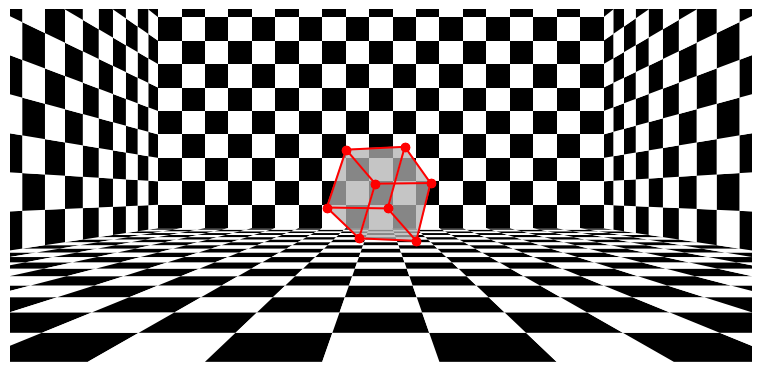

In [76]:
""" We will use a scene dictionary with keys as object names
    Each object will have its own keys containing object-specific points and transformation matrix"""

# 3-D, unit-cube (homogenous coordinates)
cube = np.array([ [0,0,0,1], [1,0,0,1], [1,1,0,1], [0,1,0,1],
                  [0,0,1,1], [1,0,1,1], [1,1,1,1], [0,1,1,1]])

# make length of the cube 12 meters
cube[:, :3] = 12 * cube[:, :3]
cube[:, :3] = cube[:, :3] - 6

height = 400 # height of the walls
plane = np.array([ [0,0,0,1], [height,0,0,1], [height,height,0,1], [0,height,0,1] ])

# create an empty scene
scene = {}
scene['ground_plane'] = {}
scene['right_plane'] = {}
scene['left_plane'] = {}
scene['back_plane'] = {}
scene['cube'] = {}

""" assign the points and transformations (Rx, Ry, Rz, Tx, Ty, Tz) """

# setup ground plane and transformation
# put the points and transformation (Rx, Ry, Rz, Tx, Ty, Tz)
scene['ground_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
scene['ground_plane']['transform'] = np.array([ 90,   0,   0, -200, -30, 100])

scene['right_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for right side plane
scene['right_plane']['transform']  = np.array([  0, -90,   0,  200, -30, 100])


scene['left_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for left side plane
scene['left_plane']['transform']   = np.array([  0,  90,   0, -200, -30, 500])


scene['back_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for back plane
scene['back_plane']['transform']   = np.array([  0, 180,   0,  200, -30, 500])

# create and transform the cube
scene['cube']['points'] = cube
scene['cube']['transform'] = np.array([30, 30, 0, 0, 0, Z_start])

# Set the static focal length and Z distance
f_static = f_start

# Initialize a dictionary to hold the projected scene
static_scene = {}

# Project each object onto the sensor
for k in scene.keys():
    cur_obj = copy.deepcopy(scene[k])
    static_scene[k] = transform_points(cur_obj, f_static)

# Visualize the static scene
static_image = visualize_scene(static_scene, grid_count)
plt.imshow(static_image, cmap='gray')  # Show the image in grayscale
plt.axis('off')
plt.show()


#### Dolly Animation

/content/utilityCode.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure( figsize=(800/my_dpi, 400/my_dpi), dpi=my_dpi)


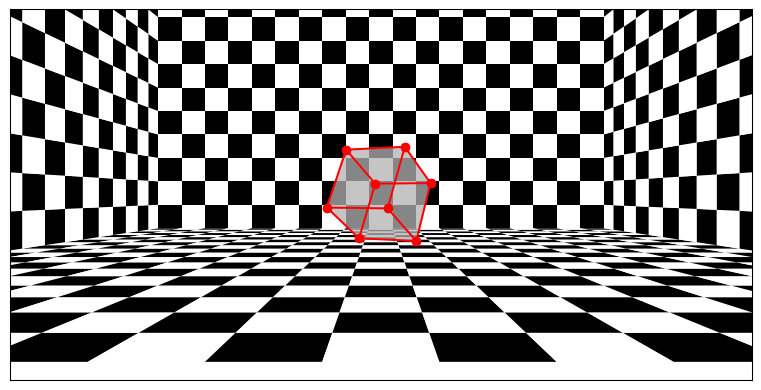

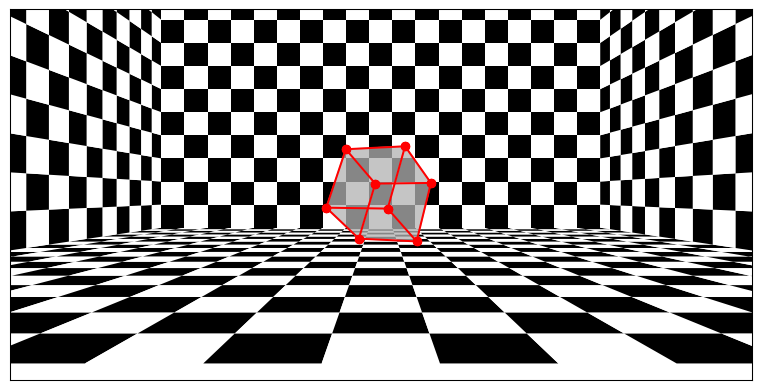

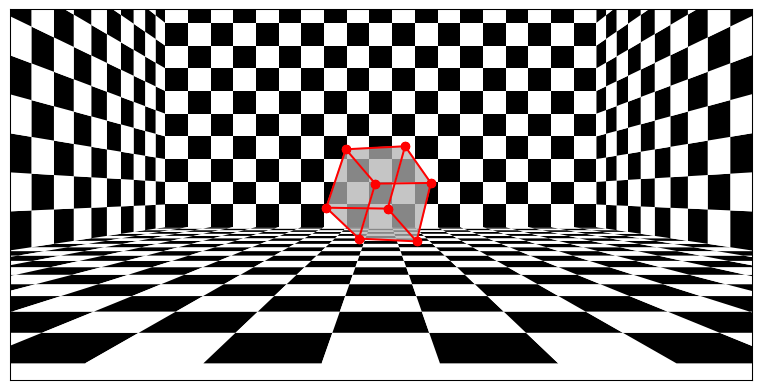

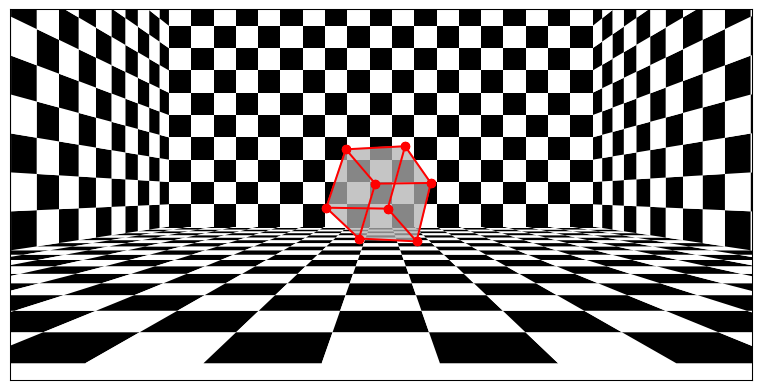

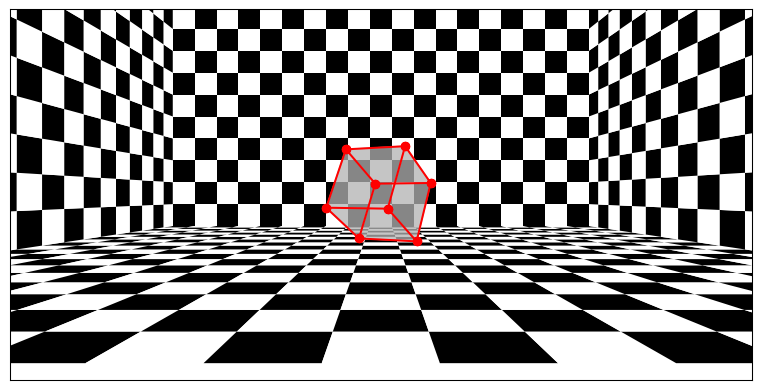

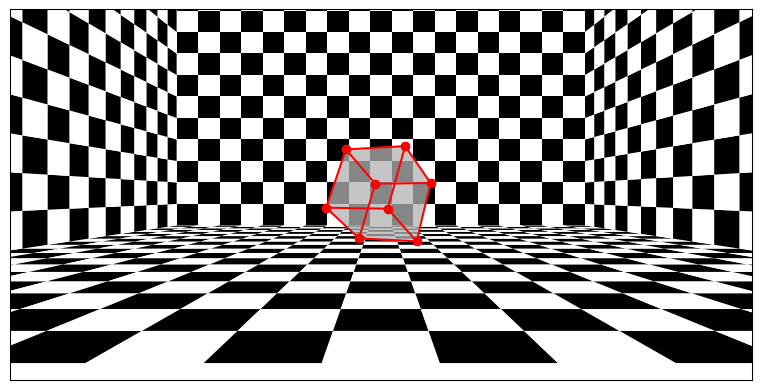

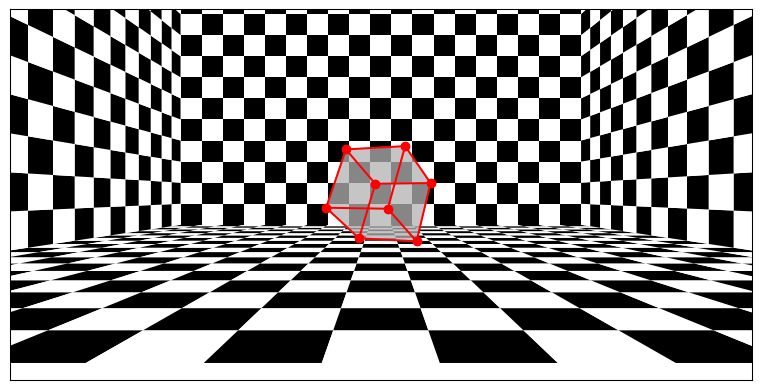

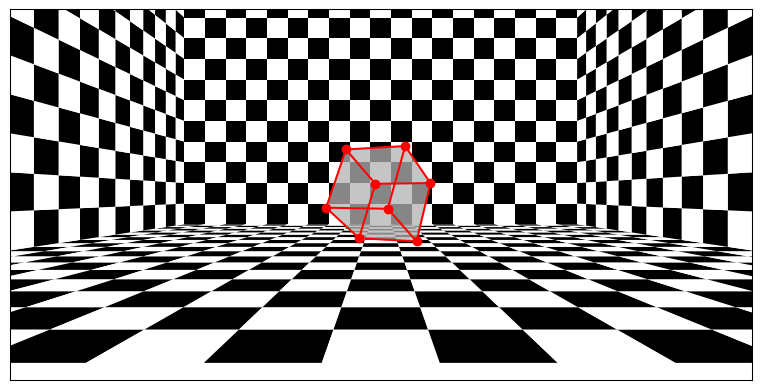

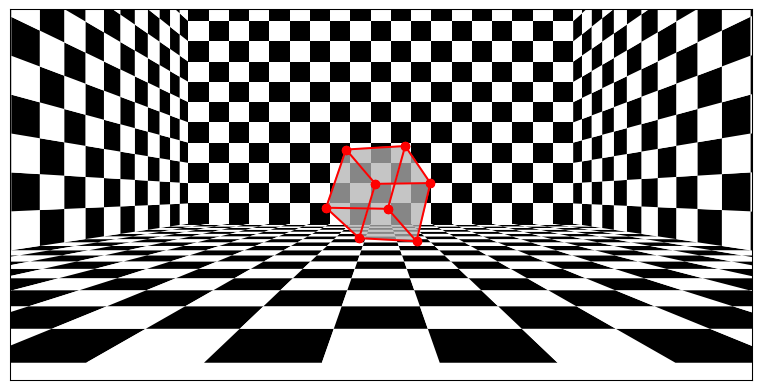

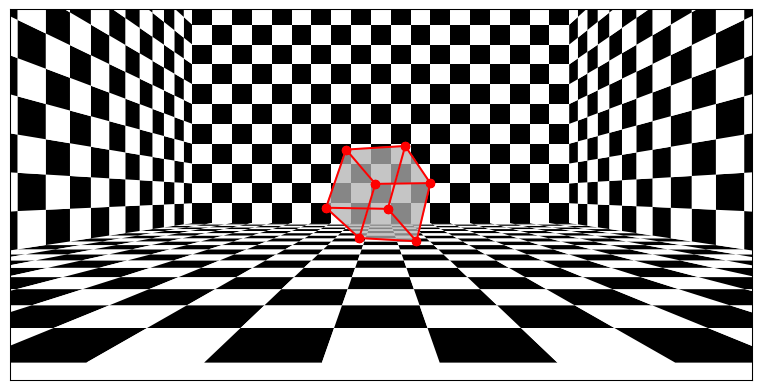

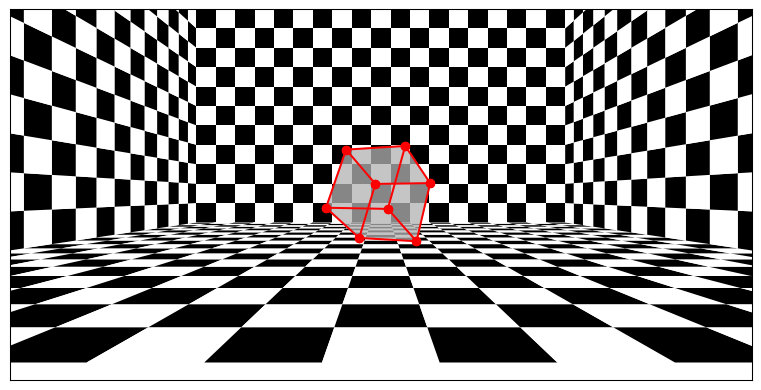

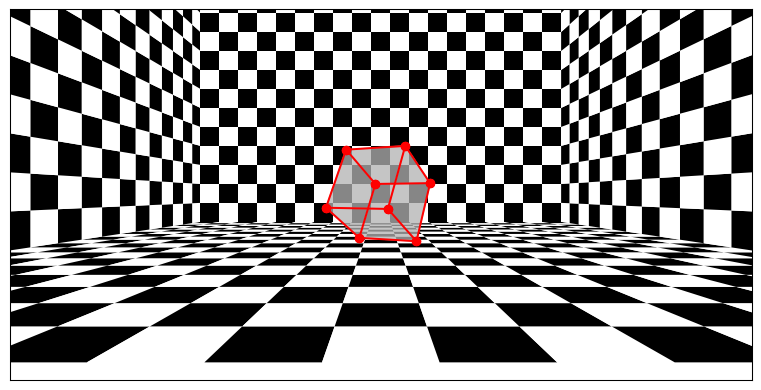

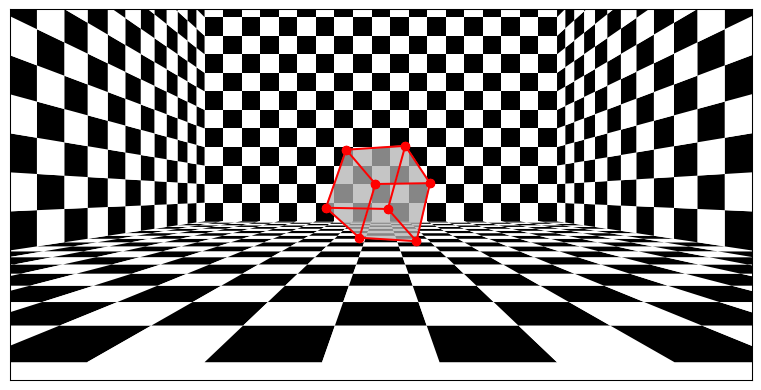

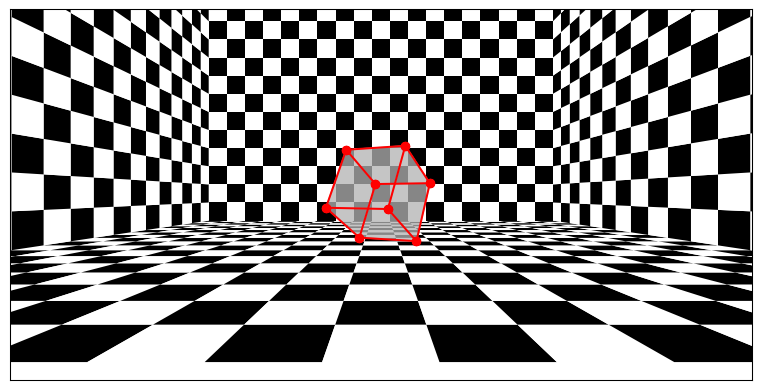

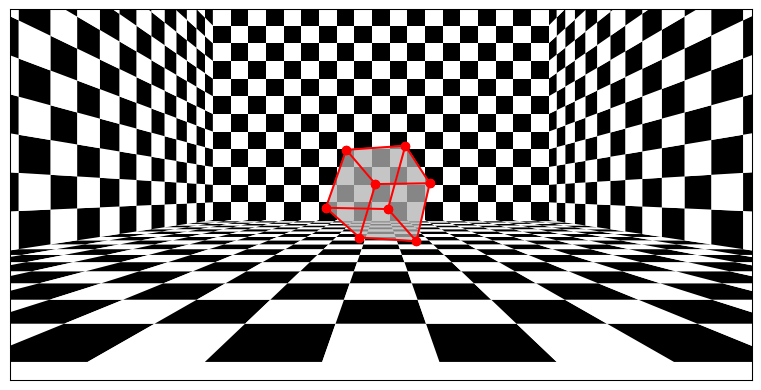

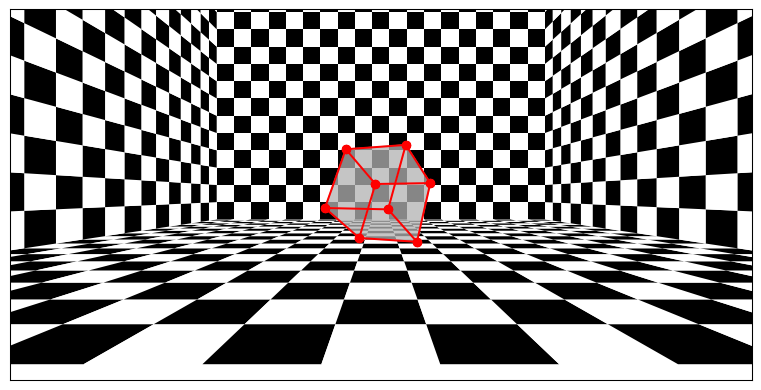

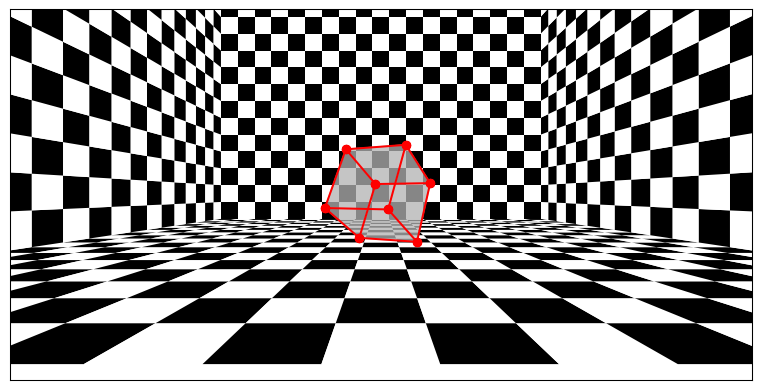

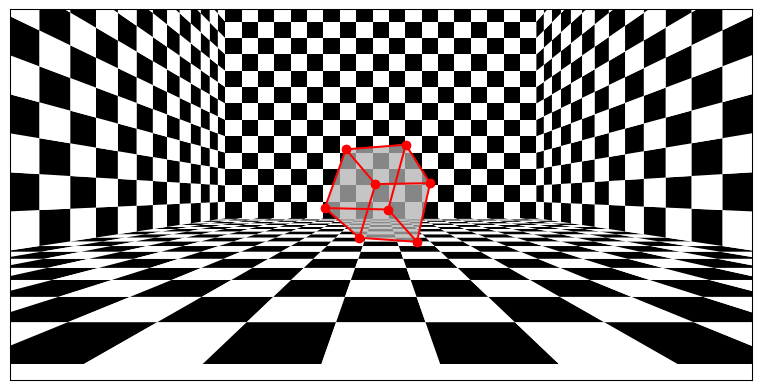

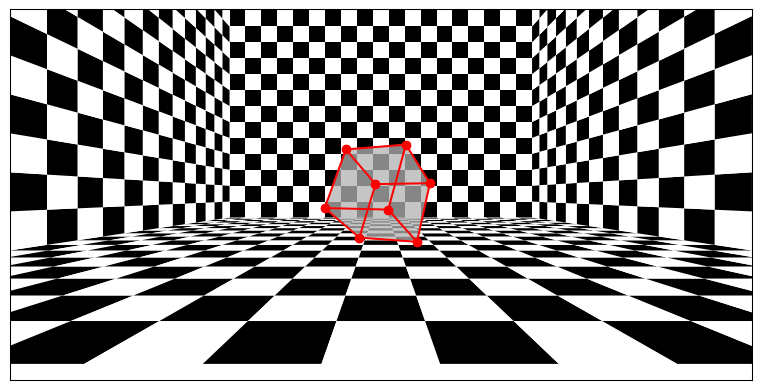

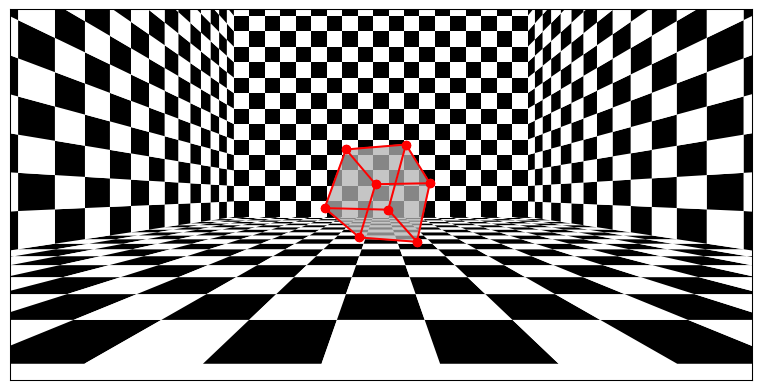

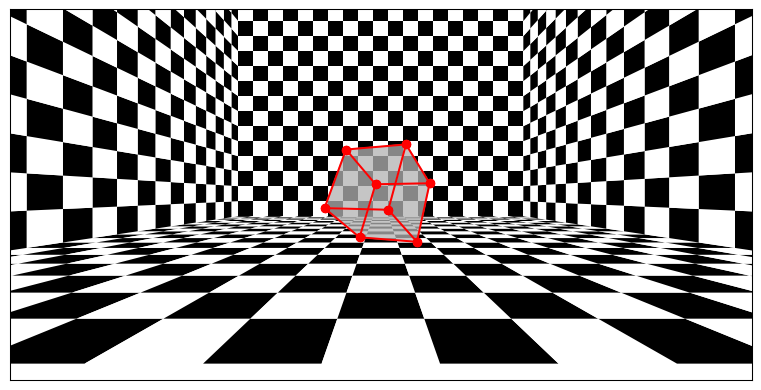

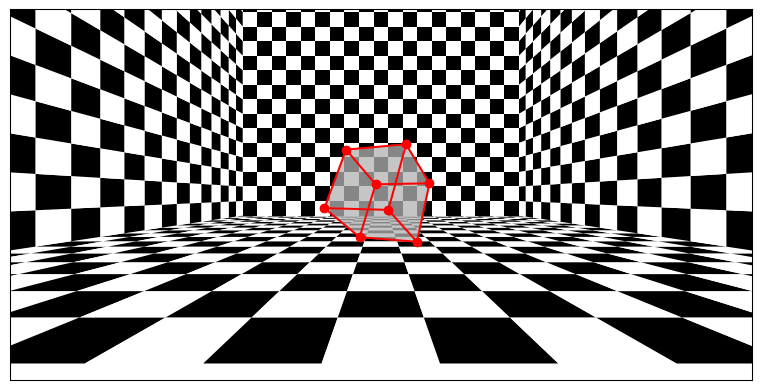

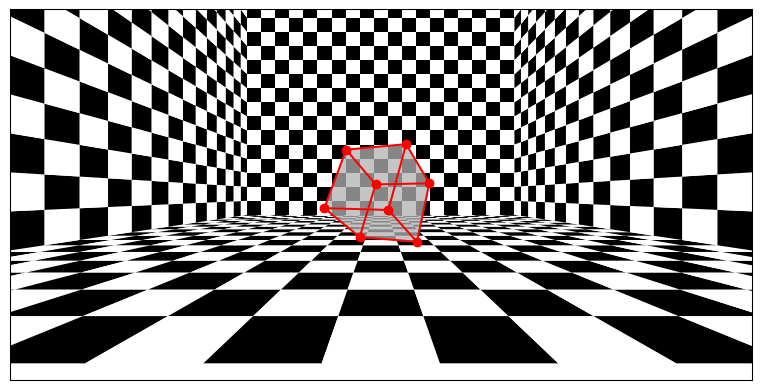

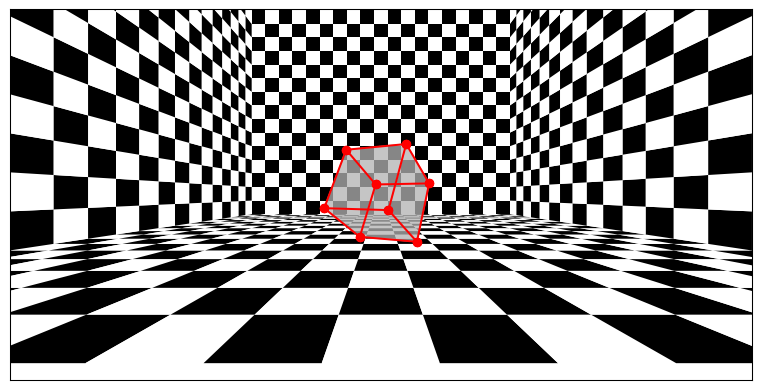

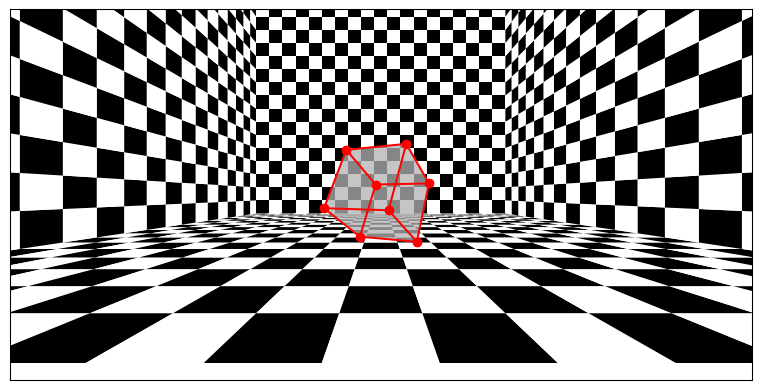

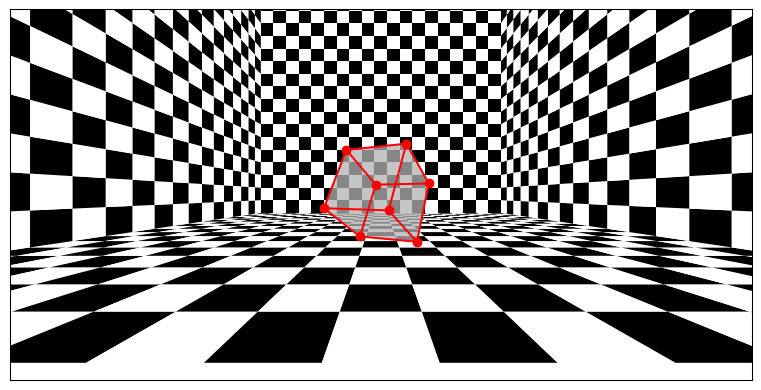

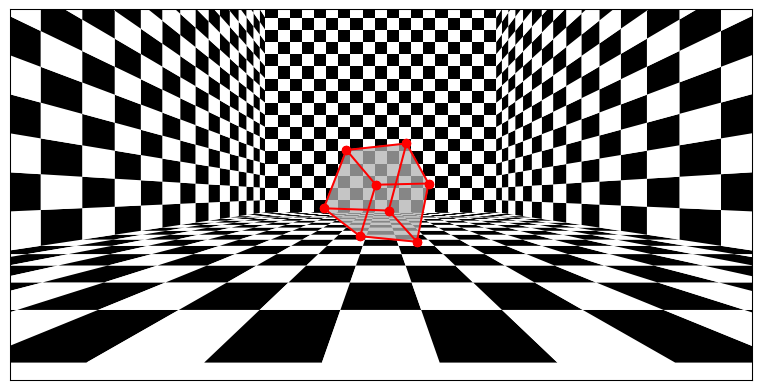

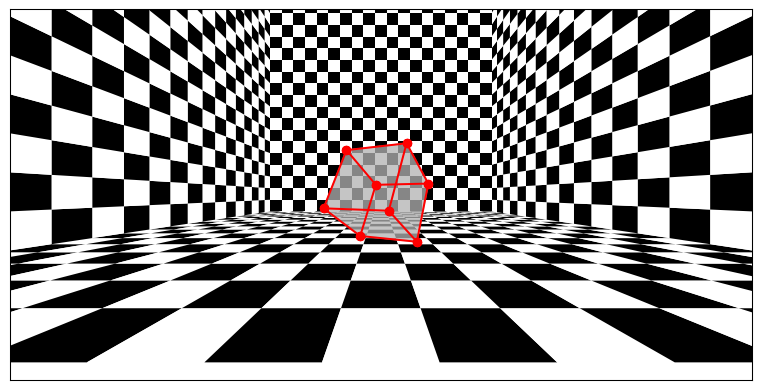

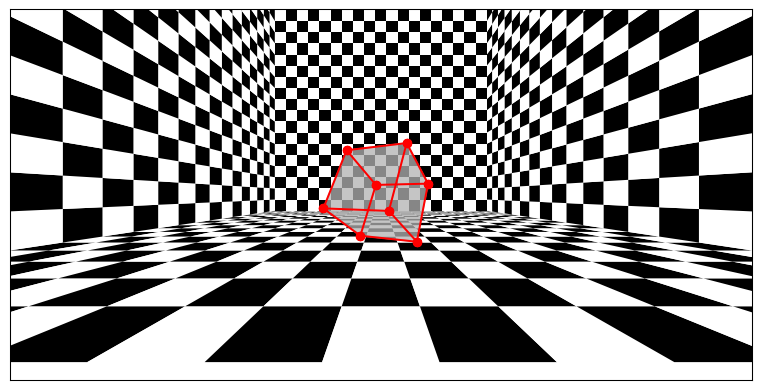

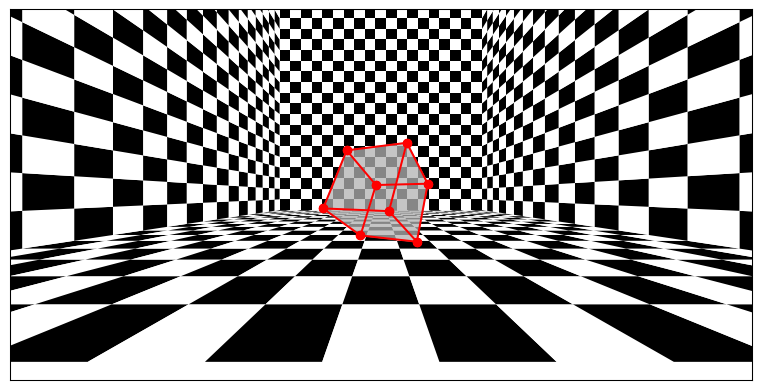

In [78]:
""" Perform the dolly of the entire scene, save images as a single gif """

## TODO Create the Z values for the dolly animation
## store Z values in a numpy array object of size [steps]
Tzs = np.linspace(Z_start, Z_end, steps)

## TODO Compute the focal length to keep the cube of same size
## store the f values for each Z step in a numpy array object of size [steps]
## this f value should be adjusted to keep the cube the same size throughout the animation
fs = f_start * (Tzs / Z_start)

# initialize the animation file
gif_writer = imageio.get_writer('output.gif', mode='I')

# update the scene and generate images
for i in range(steps):

    projected_scene = {}
    for k in scene.keys(): # iterate over the objects

        # current object in the scene
        cur_obj = copy.deepcopy(scene[k])

        Tz0 = scene[k]['transform'][-1]

        ## TODO: write code to modify the Z-values of each object in the scene
        ## hint: to understand the below assignment, look at the scene setup above and you
        ## should see we are simply assigning a unique Z value to each object for each step in
        ## the animation
        cur_obj['transform'][-1] = Tz0 + (Tzs[i] - Z_start)

        # project this objects on the sensor
        projected_scene[k] = transform_points(cur_obj, fs[i])

    # visualize the scene
    plot_img = visualize_scene(projected_scene, grid_count)

    # write the current image in the gif
    gif_writer.append_data(plot_img)

gif_writer.close()
